## Homework: Time Series Prediction with Conv1D
Use air passenger data to build a Conv1D-based time series model.

1. Preprocess
    - Define `look_back` (months used to predict the next month).
    - The input data will be the first `look_back` months, with (look_back, 1) shape.
    - The output data will be the next month value.
    - Split: first 70% train, last 30% test (we try to predict the future).
2. Use a `Conv1D` layer to predict future values.
3. Predict iteratively using the `last known point + look_back - 1` prior points.
4. Try with different look_back values and compare the results.

In [240]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import pandas as pd
# load necessary libraries
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error




In [241]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

Honestly I didnt understand how to at the same time:
- train/test split 
and
- do the lookback thing

because when I split, then I dont have all the data avaialble for training so I dont always have all the previous months (as some of them went to the test data)

what I did

In [242]:
look_back = 12
y = data["Passengers"].values.astype('float32')

scaler = MinMaxScaler()
y = scaler.fit_transform(y.reshape(-1, 1))  # Reshape to 2D for scaler
input_data = []
output_data = []
for i in range( look_back, len(y)-1 ):
    input_data.append( y[i-look_back:i] )
    output_data.append( y[i+1] )

# basically, I made input_data the look_back months before the number of passengers.

# just making it the same datatype as it was previously
# input_data = pd.core.series.Series(input_data)
# output_data = pd.core.series.Series(output_data)
input_data = np.array(input_data)
output_data = np.array(output_data)

split_idx = int(0.7 * len(input_data))
x_train, x_test = input_data[:split_idx], input_data[split_idx:]
t_train, t_test = output_data[:split_idx], output_data[split_idx:]

In [243]:
# super simple  cnn
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', 
           input_shape=(look_back, 1)),
    Flatten(),
    Dense(1, activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mse',
)
model.fit(x_train, t_train, epochs=100, batch_size=1, verbose=0)

c:\Users\grego\miniconda3\envs\ml_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [244]:
#  predictions
test_predict = model.predict(x_test)

# Invert transform
test_predict = scaler.inverse_transform(test_predict)
t_test = scaler.inverse_transform([t_test[:,0]])

# Calculate RMSE manually
test_score = np.sqrt(mean_squared_error(t_test[0], test_predict[:,0]))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


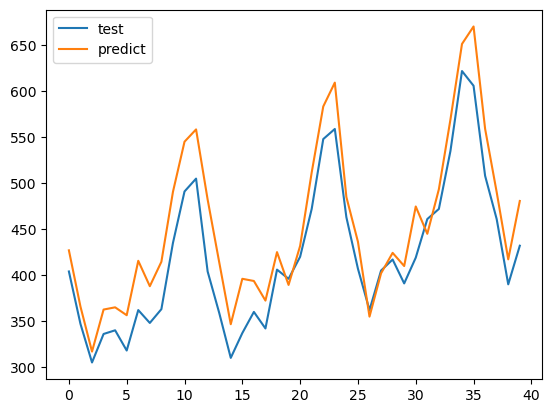

In [245]:
plt.plot(t_test[0,:], label="test")
plt.plot(test_predict, label="predict")
plt.legend()

WELL WE GOT A GOOD TEST THING, NOW i'LL ITERATE FOR DIFFERENT LOOK BACK VALUES, FIND BEST ETC...

we want the minimum score (minimum rmse)

In [246]:
look_backs = [3,6,12,24]

min_rmse = np.inf
min_rmse_look_back = -1

for look_back in look_backs:
    input_data = []
    output_data = []
    for i in range( look_back, len(y)-1 ):
        input_data.append( y[i-look_back:i] )
        output_data.append( y[i+1] )


    input_data = np.array(input_data)
    output_data = np.array(output_data)

    split_idx = int(0.7 * len(input_data))
    x_train, x_test = input_data[:split_idx], input_data[split_idx:]
    t_train, t_test = output_data[:split_idx], output_data[split_idx:]

    # super simple  cnn
    model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', 
            input_shape=(look_back, 1)),
        Flatten(),
        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer='adam',
        loss='mse',
    )
    model.fit(x_train, t_train, epochs=100, batch_size=1, verbose=0)

    #  predictions
    test_predict = model.predict(x_test)

    # Invert transform
    test_predict = scaler.inverse_transform(test_predict)
    t_test = scaler.inverse_transform([t_test[:,0]])

    # Calculate RMSE manually
    test_score = np.sqrt(mean_squared_error(t_test[0], test_predict[:,0]))

    if test_score < min_rmse:
        min_rmse = test_score
        min_rmse_look_back = look_back


c:\Users\grego\miniconda3\envs\ml_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


c:\Users\grego\miniconda3\envs\ml_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


c:\Users\grego\miniconda3\envs\ml_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


c:\Users\grego\miniconda3\envs\ml_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


In [247]:
print("best lookback value: ", min_rmse_look_back)

best lookback value:  12


The best lookback value is 12, intuitive considering that the data follows yearly patterns, let's predict and finish

In [255]:
look_back = 12

input_data = []
output_data = []
for i in range( look_back, len(y)-1 ):
    input_data.append( y[i-look_back:i] )
    output_data.append( y[i+1] )


input_data = np.array(input_data)
output_data = np.array(output_data)

split_idx = int(0.7 * len(input_data))
x_train, x_test = input_data[:split_idx], input_data[split_idx:]
t_train, t_test = output_data[:split_idx], output_data[split_idx:]

# super simple  cnn
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', 
        input_shape=(look_back, 1)),
    Flatten(),
    Dense(1, activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mse',
)
model.fit(x_train, t_train, epochs=100, batch_size=1, verbose=0)

c:\Users\grego\miniconda3\envs\ml_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [261]:
#  predictions
test_predict = model.predict(x_test)
# Invert transform
test_predict = scaler.inverse_transform(test_predict)
t_test = scaler.inverse_transform([t_test])
t_train = scaler.inverse_transform([t_train])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Predict iteratively 

In [ ]:
months_to_predict = 12

future_predictions = []
current_batch = output_data[-look_back:].reshape(1, look_back)

for i in range(months_to_predict): # this is the iterative part
    current_pred = model.predict(current_batch)
    future_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:], current_pred, axis=1)

future_predictions =  scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


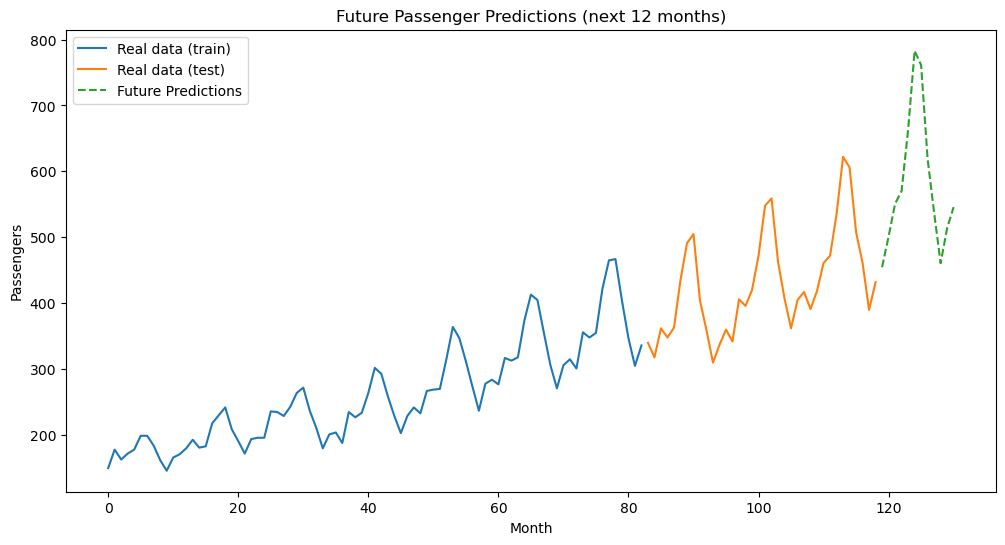

In [ ]:
# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(t_train[0,:], label="Real data (train)")
test_range = range(len(t_train[0,:]), len(t_train[0,:])+len(t_test[0,:]))
plt.plot(test_range, t_test[0,:], label="Real data (test)")
future_index = range(len(t_train[0,:])+len(t_test[0,:]), len(t_train[0,:])+len(t_test[0,:])+months_to_predict)
plt.plot(future_index, future_predictions, label='Future Predictions', linestyle='--')
plt.title(f'Future Passenger Predictions (next {months_to_predict} months)')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

Looks good to me. We predicted next 12 months but we could predict longer